In [2]:
import numpy as np
import tensorflow as tf

In [3]:
print("Tensorflow version", tf.__version__)

Tensorflow version 2.6.0


In [4]:
from tensorflow import keras

In [5]:
print("Keras version", keras.__version__)

Keras version 2.6.0


In [6]:
import matplotlib.pyplot as plt

In [7]:
np.random.seed(42) 
tf.random.set_seed(42)

In [13]:
fashion_mnist=keras.datasets.fashion_mnist

In [14]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [62]:
X_train_full.shape

(60000, 28, 28)

In [28]:
X_valid = X_train_full[:5000] / 255.

In [29]:
y_valid = y_train_full[:5000]

In [30]:
X_train = X_train_full[5000:] / 255.

In [31]:
y_train = y_train_full[5000:]

In [32]:
print("Train data shape:",X_train.shape)
print("Validation data shape:",X_valid.shape)
print("Test data shape:",y_train.shape)

Train data shape: (55000, 28, 28)
Validation data shape: (5000, 28, 28)
Test data shape: (55000,)


In [33]:
X_test = X_test / 255.

In [42]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
       "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Class label is: 4
Class name is: Coat


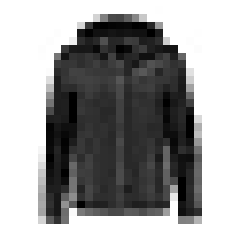

In [43]:
print("Class label is:", y_train[0])
print("Class name is:", class_names[y_train[0]])
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

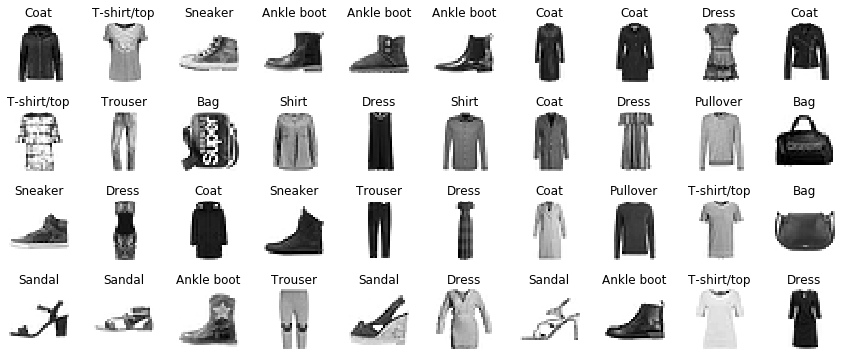

In [44]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(15, 6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index],cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [47]:
keras.backend.clear_session()

In [48]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [49]:
model.layers

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


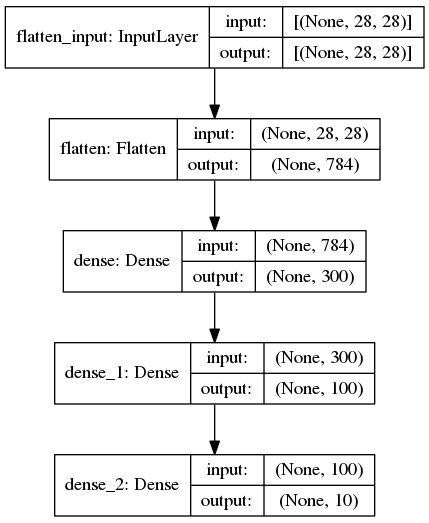

In [51]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [53]:
sgd = keras.optimizers.SGD(learning_rate=0.01)

In [54]:
model.compile(loss="sparse_categorical_crossentropy",
      optimizer=sgd,
      metrics=["accuracy"])

In [58]:
history = model.fit(X_train, y_train, epochs=30,
            validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4842 - accuracy: 0.8316 - val_loss: 0.4349 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4391 - accuracy: 0.8456 - val_loss: 0.5342 - val_accuracy: 0.7980
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4124 - accuracy: 0.8564 - val_loss: 0.3915 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3939 - accuracy: 0.8621 - val_loss: 0.3744 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3750 - accuracy: 0.8675 - val_loss: 0.3718 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3632 - accuracy: 0.8716 - val_loss: 0.3617 - val_accuracy:

dense
(784, 300) [[ 0.02428621 -0.00887149 -0.02189048 ... -0.02774751  0.03858816
  -0.06890351]
 [ 0.00458337 -0.03111771 -0.0586676  ...  0.00591962 -0.02764504
  -0.04163538]
 [-0.06295505 -0.06924617  0.07103885 ... -0.04252302  0.0712138
  -0.07312792]
 ...
 [-0.01694321  0.02149452 -0.05391731 ...  0.00037465  0.00038541
   0.06317136]
 [ 0.07235663 -0.07057827  0.07040679 ... -0.00127725 -0.00168522
   0.03152846]
 [-0.0622782   0.01552784 -0.02585155 ... -0.00466257  0.0023119
  -0.06735867]]
[ 0.1734203   0.04331314 -0.00029627 -0.10523964  0.00300405  0.09547766
  0.04953028 -0.01076079 -0.02332509  0.07070001 -0.00271627 -0.01061932
  0.09199019  0.00428276  0.16562708  0.08320349 -0.02069582  0.04056127
  0.09732205 -0.12608662  0.11600385  0.13960657  0.00182779  0.03900981
  0.05458396  0.04516074 -0.00622209  0.20675963  0.15467581  0.01823414
  0.10124981 -0.00472954  0.04889691 -0.00348026 -0.03442223  0.04381112
  0.14114    -0.07842134  0.19918925 -0.06898574  0.049

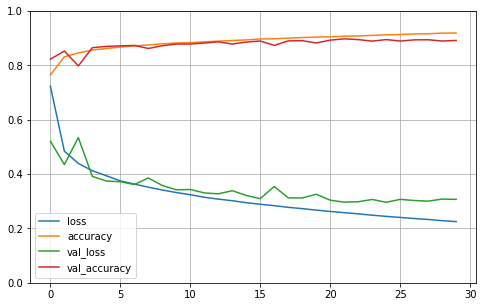

In [63]:
history.params
hidden1 = model.layers[1]
print(hidden1.name)
weights, biases = hidden1.get_weights() # getting the weights and biases
print(weights.shape, weights)
print(biases)
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

313/313 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.8819
[9 2 1]
['Ankle boot', 'Pullover', 'Trouser']


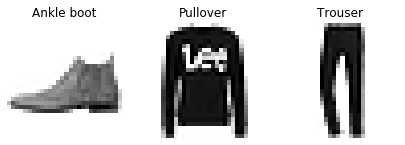

In [64]:
model.evaluate(X_test, y_test)
y_pred = np.argmax(model.predict(X_test[:3]), 1)
print(y_pred)
print([class_names[index] for index in y_pred])
plt.figure(figsize=(7, 3))

for index, image in enumerate(X_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()